In [274]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [275]:
# PROBLEM 1











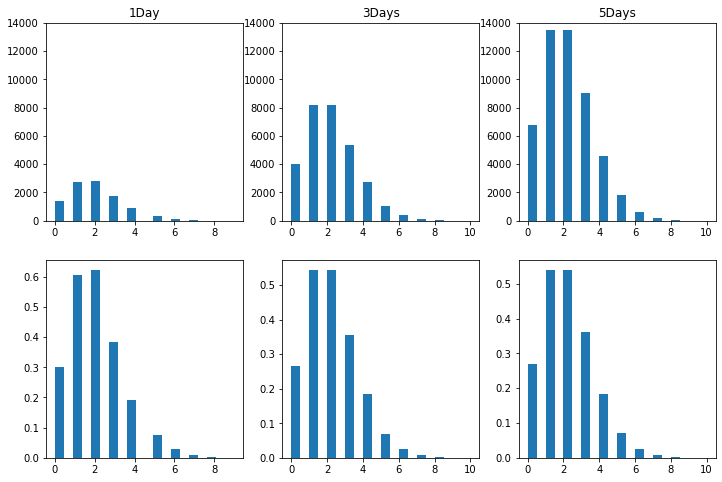

In [293]:
#A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

a = stats.poisson.rvs(mu = 2, size = 10000)
aa = stats.poisson.rvs(mu = 2, size = 10000)
aaa = stats.poisson.rvs(mu = 2, size = 10000)
aaaa = stats.poisson.rvs(mu = 2, size = 10000)
aaaaa = stats.poisson.rvs(mu = 2, size = 10000)

b = np.append(a,aa)
bb = np.append(b,aaa)
bbb = np.append(bb,aaaa)
bbbb = np.append(bbb,aaaaa)

fig, axes = plt.subplots(nrows =2, ncols = 3, figsize = (12,8))


axes[0,0].hist(a,20, density = False)
axes[0,0].set_ylim(0,14000)
axes[0,0].set_title('1Day')
axes[1,0].hist(a,20, density = True)

axes[0,1].hist(bb,20, density = False)
axes[1,1].hist(bb,20,density = True)
axes[0,1].set_ylim(0,14000)
axes[0,1].set_title('3Days')

axes[0,2].hist(bbbb,20, density = False)
axes[1,2].hist(bbbb,20, density = True)
axes[0,2].set_ylim(0,14000)
axes[0,2].set_title('5Days')
plt.show()

#B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view

#As you continue to add datasets of poisson distrobutions, he frequency of values will continue to follow the poisson curve. 
# As you add up multiple data sets, the shape will remain poisson but with a taller shape due to more occurrances of high probability points within the histogram.
#Normalizing, as is shown in the lower row, produces nearly identical plots that strongly follow the poisson distrobution due to sufficiently large data sets for each.

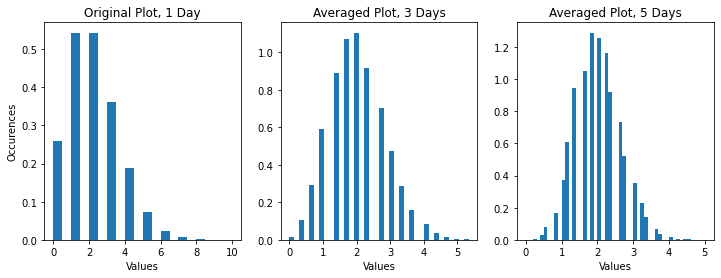

In [277]:
#C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the 
#   shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

c = (a+aa+aaa)/3
cc = (a+aa+aaa+aaaa+aaaaa)/5
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12,4))
axes[0].hist(a,20, density = True)
axes[0].set_ylabel('Occurences')
axes[0].set_xlabel('Values')
axes[0].set_title('Original Plot, 1 Day')


axes[1].hist(c,36, density = True)
axes[1].set_xlabel('Values')
axes[1].set_title('Averaged Plot, 3 Days')


axes[2].hist(cc,50, density = True)
axes[2].set_xlabel('Values')
axes[2].set_title('Averaged Plot, 5 Days')
plt.show()

#Averaging a poisson distrobution utilizes an addition of values and a division by the same number. This results in a shape that is still poisson, 
#but approaching a gaussian curve. This is the central limit theorem, that iterations of averaging a distrobution will produce a function peaked at its own 
#average value approaching the Gaussian with each additional iteration.


In [278]:
#D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your 
#observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore 
#that complication for a couple of labs.]


numdays = 2
value = 10


prob5sig = 1/3.5e6
det = stats.poisson.ppf(1-prob5sig/numdays, mu =2)
print('Minimum Value for 5 Sigma ' +str(det))
probability = (1- stats.poisson.cdf(value, mu = 2))*numdays
print('Probability for a Signal of '+str(value)+' to be caused by background '+str(probability))
sigma =-stats.norm.ppf(probability/numdays)
print('Sigma for a Signal of '+str(value)+' is '+str(sigma))

#For a 5 day interval, a value of at least 13 is required to produce a 5sigma probability.
#Signal value of produces a sigma of 4.3. Not significant enough

Minimum Value for 5 Sigma 13.0
Probability for a Signal of 10 to be caused by background 1.661644873696133e-05
Sigma for a Signal of 10 is 4.306091313409873


In [279]:
# PROBLEM 2
#Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval










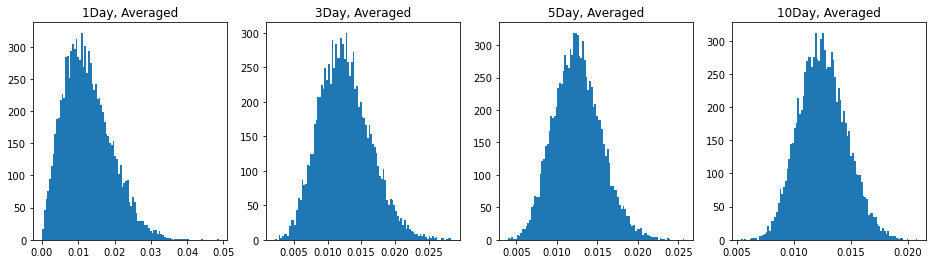

In [295]:
# A) Show how the distribution changes as you average over more observing intervals.


fig, axes = plt.subplots(nrows= 1, ncols = 4, figsize = (16,4))

a = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
aa = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
aaa = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
aaaa = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
aaaaa = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)

a6 =stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a7 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a8 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a9 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a10 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)

b = np.append(a,aa)
bb = np.append(b,aaa)
bbb = np.append(bb,aaaa)
bbbb = np.append(bbb,aaaaa)

c = (a+aa+aaa)/3
cc = (a + aa + aaa +aaaa +aaaaa)/5
ccc = (a + aa + aaa +aaaa +aaaaa +a6+a7+a8+a9+a10)/10


axes[0].hist(a,100,density = False)
axes[0].set_title('1Day, Averaged')
axes[1].hist(c,100,density = False)
axes[1].set_title('3Day, Averaged')
axes[2].hist(cc,100,density = False)
axes[2].set_title('5Day, Averaged')
axes[3].hist(ccc,100,density = False)
axes[3].set_title('10Day, Averaged')
plt.show()

#As you average over more intervals of collected data, the rayleigh curve approaches a gaussian shape. The width is also narrowed.

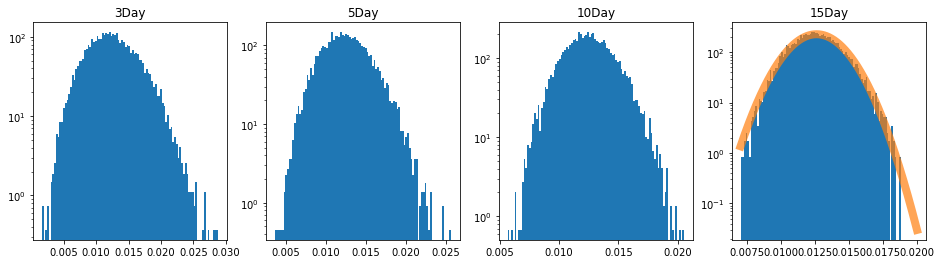

In [281]:
# B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?


fig, axes = plt.subplots(nrows= 1, ncols = 4, figsize = (16,4))

a = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
aa = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
aaa = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
aaaa = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
aaaaa = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)

a6 =stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a7 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a8 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a9 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a10 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a11 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a12 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a13 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a14 = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)
a15= stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 10000)

b = np.append(a,aa)
bb = np.append(b,aaa)
bbb = np.append(bb,aaaa)
bbbb = np.append(bbb,aaaaa)

c = (a+aa+aaa)/3
cc = (a + aa + aaa +aaaa +aaaaa)/5
ccc = (a + aa + aaa +aaaa +aaaaa +a6+a7+a8+a9+a10)/10
cccc = (a + aa + aaa +aaaa +aaaaa
        +a6+a7+a8+a9+a10+a11+a12+a13+a14+a15)/15

axes[0].hist(c,100, density = True)
axes[0].set_yscale('log')
axes[0].set_title('3Day')

axes[1].hist(cc,100, density = True)
axes[1].set_yscale('log')
axes[1].set_title('5Day')

axes[2].hist(ccc,100, density = True)
axes[2].set_yscale('log')
axes[2].set_title('10Day')

axes[3].hist(cccc,100,density = True)
axes[3].set_yscale('log')
axes[3].set_title('15Day')

x  = np.linspace(0.007,0.02,1000)
axes[3].plot(x,stats.norm.pdf(x,loc = 0.0126, scale = 0.00175),linewidth = 8, alpha = 0.7)

plt.show()
#The shape approaches gaussian. It seems to be gaussian after 15 intervals.

In [282]:
# PROBLEM 3








In [283]:
#Version 1

#A Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

Y  = 10.61
prob = stats.norm.cdf(Y,loc = 0, scale = 2)
sigma  = stats.norm.ppf(prob)
print('Sigma of ' +str(Y)+' is '+str(sigma))



#Yes, a signal strength of 10.61 does constitute significance by a sigma value > 5.

Sigma of 10.61 is 5.304999999859879


In [284]:
#Version 2

#B
# Question: What is the PDF of the background for a 10k pixel gaussian distrobution

#Each pixel has its own gaussian pdf, and this is now increased by a factor of 10k in order to evaluate each of the 10k pixels for this signal.
#This produces a sum of 10,000 gaussians curves. This increases the occurances of low probabilty signal strengths. This lowers sigma values for equivalent signal strengths


#C Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection
Y = 10.61
nupix = 10000

probability = (stats.norm.cdf(Y, loc = 0, scale = 2))/1000
sigma = -stats.norm.ppf(probability)
print('Sigma of '+str(Y) +' is '+ str(sigma))
#No, not significant. Sigma is >5

Sigma of 10.61 is 3.090232322899323


In [285]:
#PROBLEM 4








In [286]:
#A) Calculate the signal required for a 5-sigma detection in Version 1

prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
print('Signal Strength Required for 5-Sigma is '+str(det1))


Signal Strength Required for 5-Sigma is 10.001262869860762


In [287]:
#B) Calculate the signal required for a 5-sigma detection in Version 2 


prob5sig = 1/3.5e6
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
print('Signal Strength Required for 5-Sigma is '+str(det2))

Signal Strength Required for 5-Sigma is 13.102052788103173


In [288]:
#C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. 
#   Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

diff = det2/det1-1
diff
#Using parts A and B, the signal difference required is ~31%. This increase can be considered low given a penalty factor of 10,000.
# Looking at probability distrobutions, the edges of plots change very little, leaving similar probabilites for even order of magnitude changes.

0.3100398378275584

In [292]:
#D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?



Y = 10.61
nupix = 10

prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
print(det2/det1 - 1)

nupix = 100
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
print(det2/det1 - 1)

nupix = 1000
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
print(det2/det1 - 1)

nupix = 10000
prob5sig = 1/3.5e6
det1 = stats.norm.ppf(1-(1/3.5e6), loc = 0, scale = 2)
det2 = stats.norm.ppf(1-(prob5sig/nupix), loc = 0, scale = 2)
print(det2/det1 - 1)

#changes about 7% per order of magnitude. 

0.08536668760216526
0.16483520554443043
0.23946675568828768
0.3100398378275584
